In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from IPython import display # unused
from sklearn.feature_selection import SelectPercentile, f_regression

# split into features and target (IC)
df = pd.read_csv("rownormaliseddocword.csv")
features = df.drop(['IC'], axis=1)
target = df['IC']
features.shape

(148, 3000)

In [2]:
# select only the top 10% of words that will help classify IC
features_new_percentile = SelectPercentile(f_regression, percentile=10).fit(features, target)
indices = features_new_percentile.get_support(True)
print("These are the indices of the words in the top percentage for correlation of IC: 1x300")
print(indices)
features_new_percentile=features_new_percentile.transform(features)
# print("This is the data accociated with each word: 148x300")
# print(features_new_percentile)

These are the indices of the words in the top percentage for correlation of IC: 1x300
[   1    2    5    7   12   13   14   19   24   29   32   33   35   37
   39   40   55   56   57   59   61   62   79   85   93   96  112  118
  128  138  139  154  158  162  163  168  174  181  187  199  204  229
  272  313  344  347  348  351  352  353  356  357  358  361  364  367
  368  369  373  376  378  379  380  381  387  394  395  397  405  411
  415  417  418  420  425  426  428  438  442  445  449  451  457  465
  467  470  476  480  481  500  501  504  505  507  511  512  513  515
  516  534  541  542  553  558  565  566  569  570  571  573  580  581
  582  594  599  602  603  618  626  627  632  636  639  648  650  652
  653  656  658  662  663  666  667  668  694  696  697  714  728  736
  740  741  743  779  784  795  801  803  811  815  823  843  850  852
  877  878  882  884  892  908  917  920  947  951  962  973  978 1022
 1027 1046 1050 1057 1058 1062 1078 1081 1082 1094 1097 1112 1

In [3]:
# useful_words will be the top 10% of words,which after mannually
# filtering will be input into knime prediction algorithms. 
useful_words=[]
for elem in indices:
    useful_words.append(df.columns[elem])
for elem in useful_words:
    print(elem)

will
by
i
our
an
but
may
are
such
end
has
can
other
those
national
between
we
been
at
would
who
present
consideration
support
opinion
intercourse
was
new
work
need
security
provide
defense
know
plan
opportunity
welfare
terms
pacific
favorable
recommendation
deemed
science
truly
its
upon
more
were
must
under
american
had
us
world
do
during
make
nation
subject
two
much
what
laws
federal
treaty
treasury
report
secretary
amount
up
relations
give
condition
because
way
countries
thus
duties
mexico
question
revenue
territory
army
economy
several
having
tax
commercial
help
americans
program
june
here
next
come
care
cost
case
health
annual
budget
appropriations
let
history
sum
results
minister
million
education
receipts
growth
needs
man
today
bring
social
gold
ask
members
billion
held
keep
operation
want
tonight
payment
portion
programs
operations
cannot
down
serious
march
authorized
problems
july
reform
silver
believed
extended
notes
income
similar
jobs
lives
except
mail
back
used
hoped
claim


In [9]:
# store useful words and features_new_percentile into a dataframe and export
# it as a csv file named useful_words_unfiltered.csv
i=0 # i represents the correct index from useful words and indices
useful_words_df = pd.DataFrame()
for elem in df: # elem represents the column name in df 
    if i < len(useful_words) and useful_words[i] == elem:
        d_subset = df.iloc[:,indices[i]]
        useful_words_df[elem] = d_subset
        i+=1
useful_words_df['IC'] = df.iloc[:,3000]
useful_words_df = useful_words_df.iloc[:,31:]
useful_words_df.to_csv(r'C:\Users\R-k-l\AppData\Local\Programs\Python\Python37\Scripts\251Project\useful_words_unfiltered.csv')
useful_words_df.shape

(148, 270)

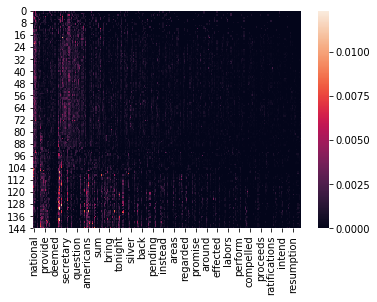

In [6]:
dframe = dframe.drop(['IC'], axis=1)
sns.heatmap(dframe)

In [10]:
for elem in useful_words_df:
    print(elem)

provide
defense
know
plan
opportunity
welfare
terms
pacific
favorable
recommendation
deemed
science
truly
its
upon
more
were
must
under
american
had
us
world
do
during
make
nation
subject
two
much
what
laws
federal
treaty
treasury
report
secretary
amount
up
relations
give
condition
because
way
countries
thus
duties
mexico
question
revenue
territory
army
economy
several
having
tax
commercial
help
americans
program
june
here
next
come
care
cost
case
health
annual
budget
appropriations
let
history
sum
results
minister
million
education
receipts
growth
needs
man
today
bring
social
gold
ask
members
billion
held
keep
operation
want
tonight
payment
portion
programs
operations
cannot
down
serious
march
authorized
problems
july
reform
silver
believed
extended
notes
income
similar
jobs
lives
except
mail
back
used
hoped
claim
authorities
articles
live
expenditure
get
propose
interior
pending
issued
enough
cut
reports
circulation
promptly
application
workers
deficit
instead
strengthen
adoption
pra